In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/images/image_cat.jpg
/kaggle/input/images/toronjas.jpg
/kaggle/input/images/damaged_astronaut.png
/kaggle/input/images/face_det25.jpg
/kaggle/input/images/4.1.01.tiff
/kaggle/input/images/steps_contours.png
/kaggle/input/images/building_image.jpg
/kaggle/input/images/face_det3.jpg
/kaggle/input/images/sevilleup(2).jpg
/kaggle/input/images/noise-noisy-nature.jpg
/kaggle/input/images/sally2.jpg
/kaggle/input/images/coffee.png
/kaggle/input/images/dices.png
/kaggle/input/images/r5.png
/kaggle/input/images/corners_building_top.jpg
/kaggle/input/images/image_aerial.tiff
/kaggle/input/images/chest_xray_image.png
/kaggle/input/images/face_det_friends22.jpg
/kaggle/input/images/madrid.jpg
/kaggle/input/images/bw.jpg
/kaggle/input/images/world_image_binary.jpg
/kaggle/input/images/shapes52.jpg
/kaggle/input/images/fruits-2.jpg
/kaggle/input/images/4.2.06_w_logo_2_2.png
/kaggle/input/images/miny.jpeg
/kaggle/input/images/dogs_banner.jpg
/kaggle/input/images/face_det9.jpg
/kaggle/in

In [2]:
from skimage.restoration import inpaint
from skimage import data
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.segmentation import slic
from skimage.color import label2rgb, rgb2gray
from skimage import filters

In [3]:
def show_image(image,title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
image_with_logo=plt.imread("/kaggle/input/images/4.2.06_w_logo_2_2.png")
fruit_image=plt.imread("/kaggle/input/images/fruits_square.jpg")
noisy_image=plt.imread("/kaggle/input/images/miny.jpeg")
landscape_image=plt.imread("/kaggle/input/images/noise-noisy-nature.jpg")
face_image=plt.imread("/kaggle/input/images/chinese.jpg")
horse_image=data.horse()
image_dice=plt.imread("/kaggle/input/images/dices.png")
shape_contours=plt.imread("/kaggle/input/images/steps_contours.png")

# Image Restoration

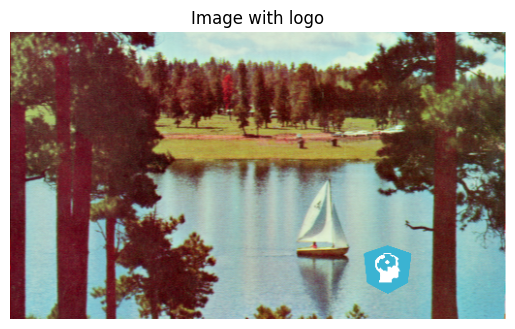

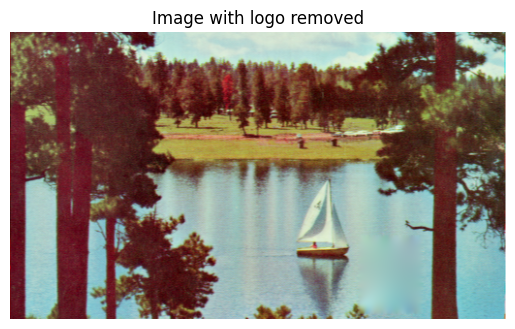

In [5]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  channel_axis=-1)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

# Noise

## Adding Noise

In [6]:
from skimage.util import random_noise

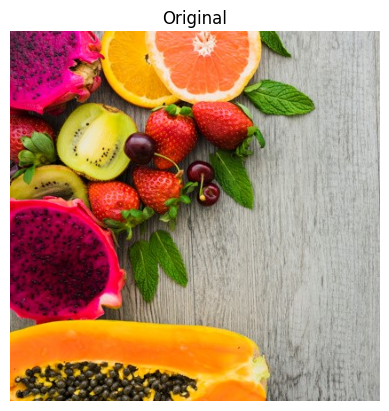

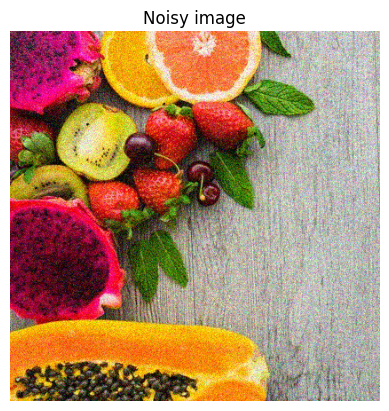

In [7]:
# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

## Reducing Noise

### a) denoise_tv_chambolle

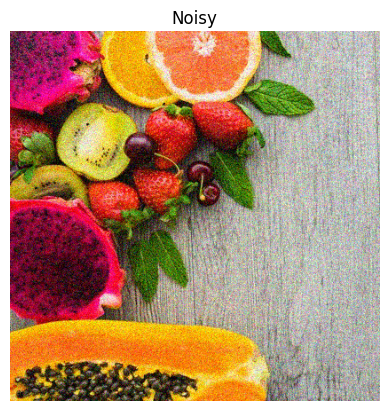

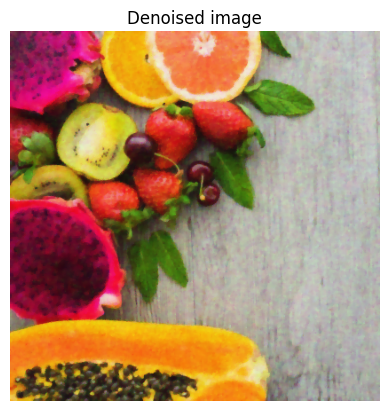

In [8]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      channel_axis=-1)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

### b) denoise_bilateral

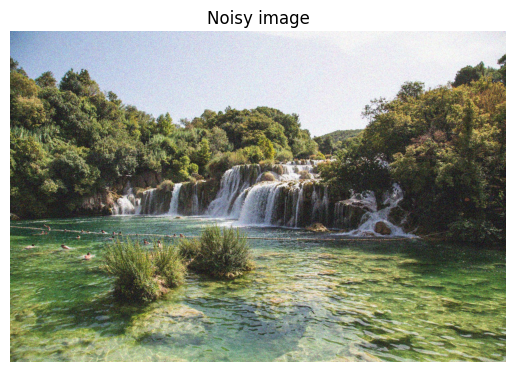

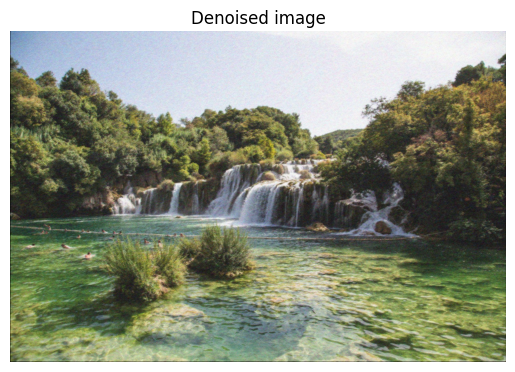

In [9]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   channel_axis=-1)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

# Superpixels & Segmentation

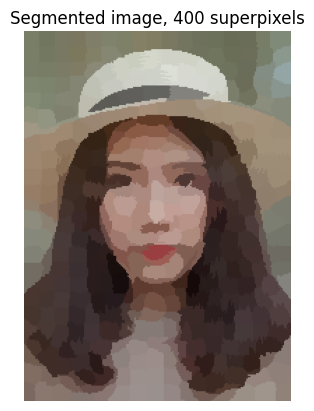

In [10]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb
# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

# Finding Contours

In [11]:
def show_image_contour(image, contours):
    """
    Displays the given image with the contours overlaid.
    
    Parameters:
    image (numpy.ndarray): The input image to display.
    contours (list of numpy.ndarray): A list of numpy arrays, where each array represents a contour.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

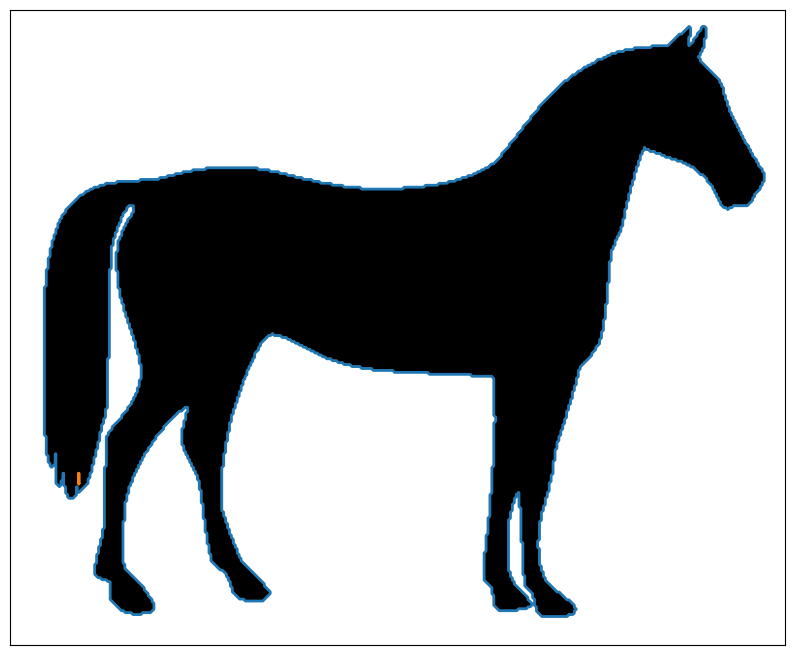

In [12]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)